In [1]:
from typing_extensions import Annotated

from typing import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:


class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [5]:
import os

from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")

In [8]:
#Node implementation for a simple chatbot node

def chatbot(state: State):
    return {"messages":[llm.invoke(state["messages"])]}

In [12]:
graph_builder = StateGraph(State)

# adding nodes to graph
graph_builder.add_node("llmChatBot", chatbot)

# adding the edge
graph_builder.add_edge(START, "llmChatBot")
graph_builder.add_edge("llmChatBot", END)

# compile the graph
graph = graph_builder.compile()

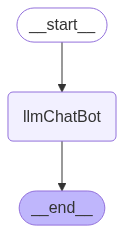

In [13]:
# Visualize the graph

from IPython.display import display, Image

def display_graph(graph):
    try:
        display(Image(graph.get_graph().draw_mermaid_png()))
    except Exception:
        raise Exception("could not visualize state graph")

display_graph(graph)

In [18]:
response = graph.invoke({"messages": "Hello!"})
response = response["messages"][-1].content
response

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"